## Problem Statement:
### To predict if the client will subscribe a term deposit

Abstract: The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).	

Data Set Information:
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

Data Set Characteristics:  	Multivariate	
Number of Instances:	45211	
Area:	Business

Attribute Characteristics:	Real	
Number of Attributes:	17	
Date Donated	2012-02-14
Associated Tasks:	Classification	
Missing Values?	N/A	



# Approach:

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).A decision tree can be built with target variable 'y' & The decision tree would use the values of the other attributes to make this prediction. 

###### Import necessary Libraries

In [1]:
# Importing Data Analysis Librarys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the data
bank_data=pd.read_csv('Bank Client Deposit Data set Classification.csv')

In [3]:
bank_data.head()#shows top 5 observations

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


###### Exploratory Data Analysis

In [4]:
# take a look at the type, number of columns, entries, null values etc..
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
#Checking out the categories and their respective counts in each feature
print("Age:",bank_data.age.value_counts(),sep = '\n')
print("-"*40)
print("Job:",bank_data.job.value_counts(),sep = '\n')
print("-"*40)
print("Marital:",bank_data.marital.value_counts(),sep = '\n')
print("-"*40)
print("Education:",bank_data.education.value_counts(),sep = '\n')
print("-"*40)
print("Default:",bank_data.default.value_counts(),sep = '\n')
print("-"*40)
print("Housing loan:",bank_data.housing.value_counts(),sep = '\n')
print("-"*40)
print("Personal loan:",bank_data.loan.value_counts(),sep = '\n')
print("-"*40)
print("Contact:",bank_data.contact.value_counts(),sep = '\n')
print("-"*40)
print("Month:",bank_data.month.value_counts(),sep = '\n')
print("-"*40)
print("Day:",bank_data.day.value_counts(),sep = '\n')
print("-"*40)
print("Previous outcome:",bank_data.poutcome.value_counts(),sep = '\n')
print("-"*40)
print("Outcome of this campaign:",bank_data.y.value_counts(),sep = '\n')
print("-"*40)

Age:
32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64
----------------------------------------
Job:
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
----------------------------------------
Marital:
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
----------------------------------------
Education:
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
----------------------------------------
Default:
no     44396
yes      815
Name: default, dtype: int64
----------------------------------------
Housing loan:
yes    25130
no     20081
Name: housing, dtype: int64
-

### Dealing with Missing Values
Firstly I start to work with missing values for this kind of project. In the dataset there is no missing values but there are some "Unknown" values which are actually missing values for us. So I start to pre-processing by removing this values from dataset

In [6]:
for column in bank_data.columns:
    bank_data[column].replace(['unknown','?',"","na","NA"], np.nan, inplace=True)

In [7]:
bank_data.isna().sum()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64

In [8]:
bank_data=bank_data.drop(labels='poutcome',axis=1)

In [9]:
bank_data.reset_index(inplace=True,drop=True)
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,no


In [10]:
bank_data.shape# get shape of dataframe

(45211, 16)

In [11]:
bank_data.dropna(inplace=True)

In [12]:
bank_data.reset_index(inplace=True,drop=True)
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,27,management,single,secondary,no,35,no,no,cellular,4,jul,255,1,-1,0,no
1,54,blue-collar,married,primary,no,466,no,no,cellular,4,jul,297,1,-1,0,no
2,43,blue-collar,married,secondary,no,105,no,yes,cellular,4,jul,668,2,-1,0,no
3,31,technician,single,secondary,no,19,no,no,telephone,4,jul,65,2,-1,0,no
4,27,technician,single,secondary,no,126,yes,yes,cellular,4,jul,436,4,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30902,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,yes
30903,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,yes
30904,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,yes
30905,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,no


In [13]:
bank_data.shape# get shape of dataframe

(30907, 16)

In [14]:
bank_data.isna().sum()#count of null values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
y            0
dtype: int64

In [15]:
bank_data.duplicated().sum()#display count of duplicated row 

0

In [16]:
bank_data.nunique()

age            75
job            11
marital         3
education       3
default         2
balance      6158
housing         2
loan            2
contact         2
day            31
month          12
duration     1449
campaign       50
pdays         530
previous       40
y               2
dtype: int64

In [17]:
## to better understand the numeric data, we want to use the .describe() method. This gives us an understanding of the central tendencies of the data 
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,30907.000000,30907.000000,30907.000000,30907.000000,30907.000000,30907.000000,30907.000000
mean,40.918918,1425.760701,15.967257,260.485003,4.078267,55.944835,0.808490
std,10.922583,3190.967030,8.226736,257.783963,69.081311,112.726930,2.706169
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,32.000000,80.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,473.000000,16.000000,181.000000,2.000000,-1.000000,0.000000
75%,48.000000,1502.500000,21.000000,322.000000,3.000000,10.000000,1.000000
max,95.000000,102127.000000,31.000000,4918.000000,5553.000000,871.000000,275.000000


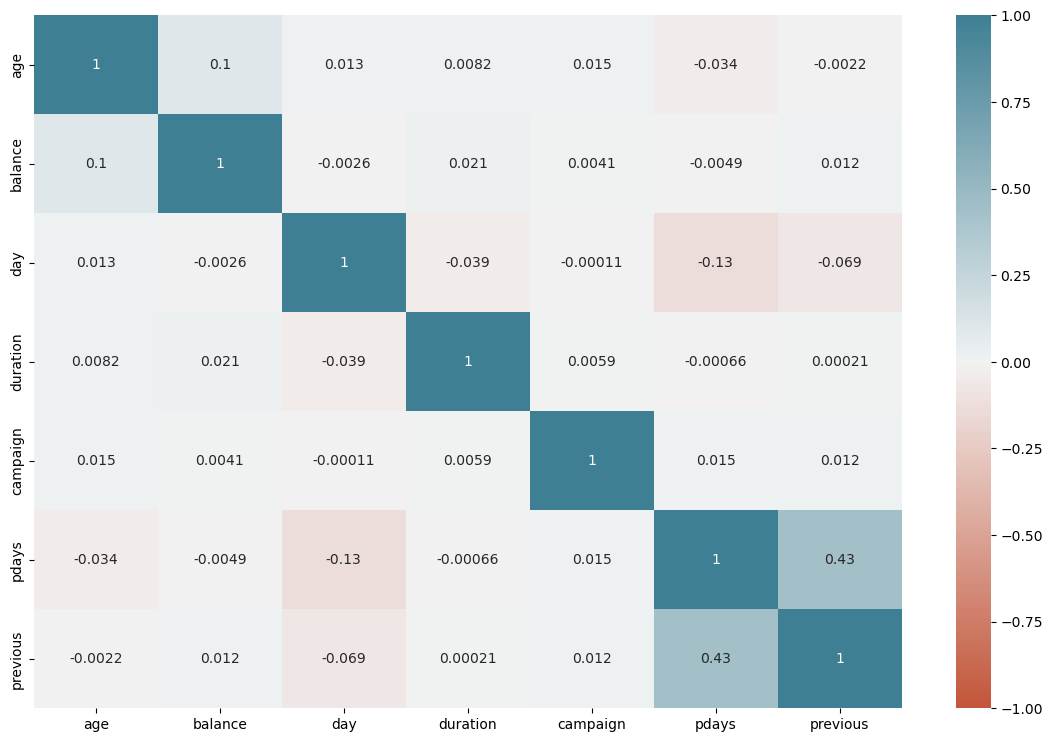

In [18]:
fig, ax = plt.subplots(figsize=(14,9))
sns.heatmap(bank_data.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), annot=True)
plt.show()

Duration highly affects the output target (e.g., if duration=0 then y=‘no’). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### 1. Bank client data Attributes Analysis 

In [19]:
# Slicing DataFrame to treat separately, make things more easy
bank_client = bank_data.iloc[: , 0:8]
bank_client.head()

,age,job,marital,education,default,balance,housing,loan
0,27,management,single,secondary,no,35,no,no
1,54,blue-collar,married,primary,no,466,no,no
2,43,blue-collar,married,secondary,no,105,no,yes
3,31,technician,single,secondary,no,19,no,no
4,27,technician,single,secondary,no,126,yes,yes


In [20]:
#droping balance column
bank_client=bank_client.drop(labels='balance',axis=1)

In [21]:
bank_client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30907 entries, 0 to 30906
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        30907 non-null  int64 
 1   job        30907 non-null  object
 2   marital    30907 non-null  object
 3   education  30907 non-null  object
 4   default    30907 non-null  object
 5   housing    30907 non-null  object
 6   loan       30907 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.7+ MB


In [22]:
# knowing the categorical variables 
print('job:',bank_client['job'].unique(),'\n Total job category',bank_client['job'].nunique())
print('\n Marital:', bank_client['marital'].unique())
print('\n Education:', bank_client['education'].unique())
print('\n Default:', bank_client['default'].unique())
print('\n Housing:', bank_client['housing'].unique())
print('\n Loan:', bank_client['loan'].unique())

job: ['management' 'blue-collar' 'technician' 'services' 'admin.' 'unemployed'
 'entrepreneur' 'housemaid' 'retired' 'self-employed' 'student'] 
 Total job category 11

 Marital: ['single' 'married' 'divorced']

 Education: ['secondary' 'primary' 'tertiary']

 Default: ['no' 'yes']

 Housing: ['no' 'yes']

 Loan: ['no' 'yes']


###### 1.Age 

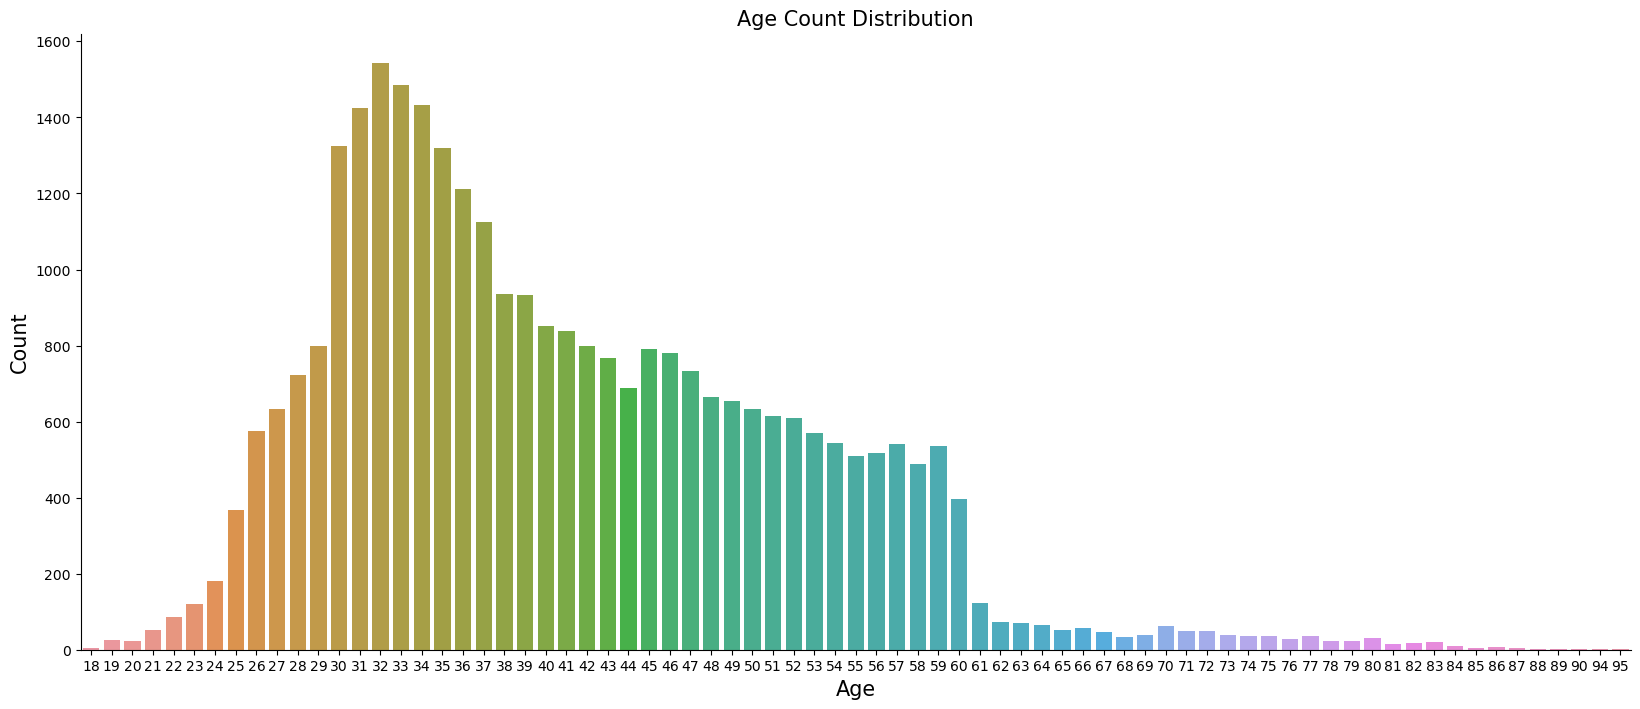

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = bank_client)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

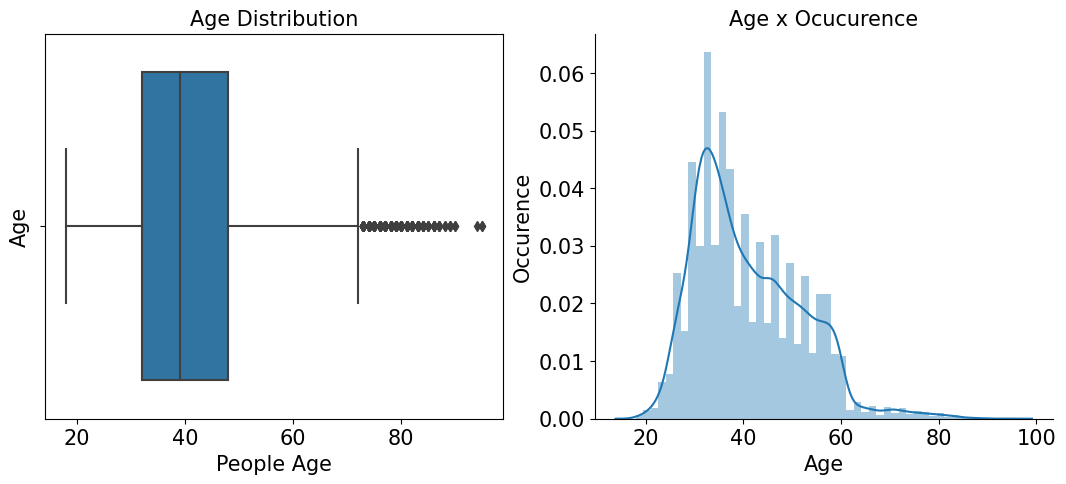

In [24]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'age', data = bank_client, orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(bank_client['age'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)


How to interpret boxplot
*Median: In the box plot, the median is displayed rather than the mean.
* Q1: The first quartile (25%) position.
* Q3: The third quartile (75%) position.
* Interquartile range (IQR): a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles. It represents how 50% of the points were dispersed.
* Lower and upper 1.5*IQR whiskers: These represent the limits and boundaries for the outliers.
* Outliers: Defined as observations that fall below Q1 − 1.5 IQR or above Q3 + 1.5 IQR. Outliers are displayed as dots or circles.

Distribution plot: 
If one tail is longer than another, the distribution is skewed. These distributions are sometimes called asymmetric or asymmetrical distributions as they don’t show any kind of symmetry. Symmetry means that one half of the distribution is a mirror image of the other half. For example, the normal distribution is a symmetric distribution with no skew. The tails are exactly the same.

In [25]:
# Quartiles
print('1º Quartile: ', bank_client['age'].quantile(q = 0.25))
print('2º Quartile: ', bank_client['age'].quantile(q = 0.50))
print('3º Quartile: ', bank_client['age'].quantile(q = 0.75))
print('4º Quartile: ', bank_client['age'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower_limit = q1 - (IQR * 1.5)
  # upper_limit = q3 + (IQR * 1.5)
print('Ages above: ', bank_client['age'].quantile(q = 0.75) + 
                      1.5*(bank_client['age'].quantile(q = 0.75) - bank_client['age'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  32.0
2º Quartile:  39.0
3º Quartile:  48.0
4º Quartile:  95.0
Ages above:  72.0 are outliers


In [26]:
print('Numerber of outliers: ', bank_client[bank_client['age'] > 70.5]['age'].count())
print('Number of clients: ', len(bank_client))

Numerber of outliers:  434
Number of clients:  30907


In [27]:
#function to creat group of ages, this helps because we have 77 differente values here
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 33, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 33) & (dataframe['age'] <= 39), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 39) & (dataframe['age'] <= 48), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 48) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

age(bank_client);

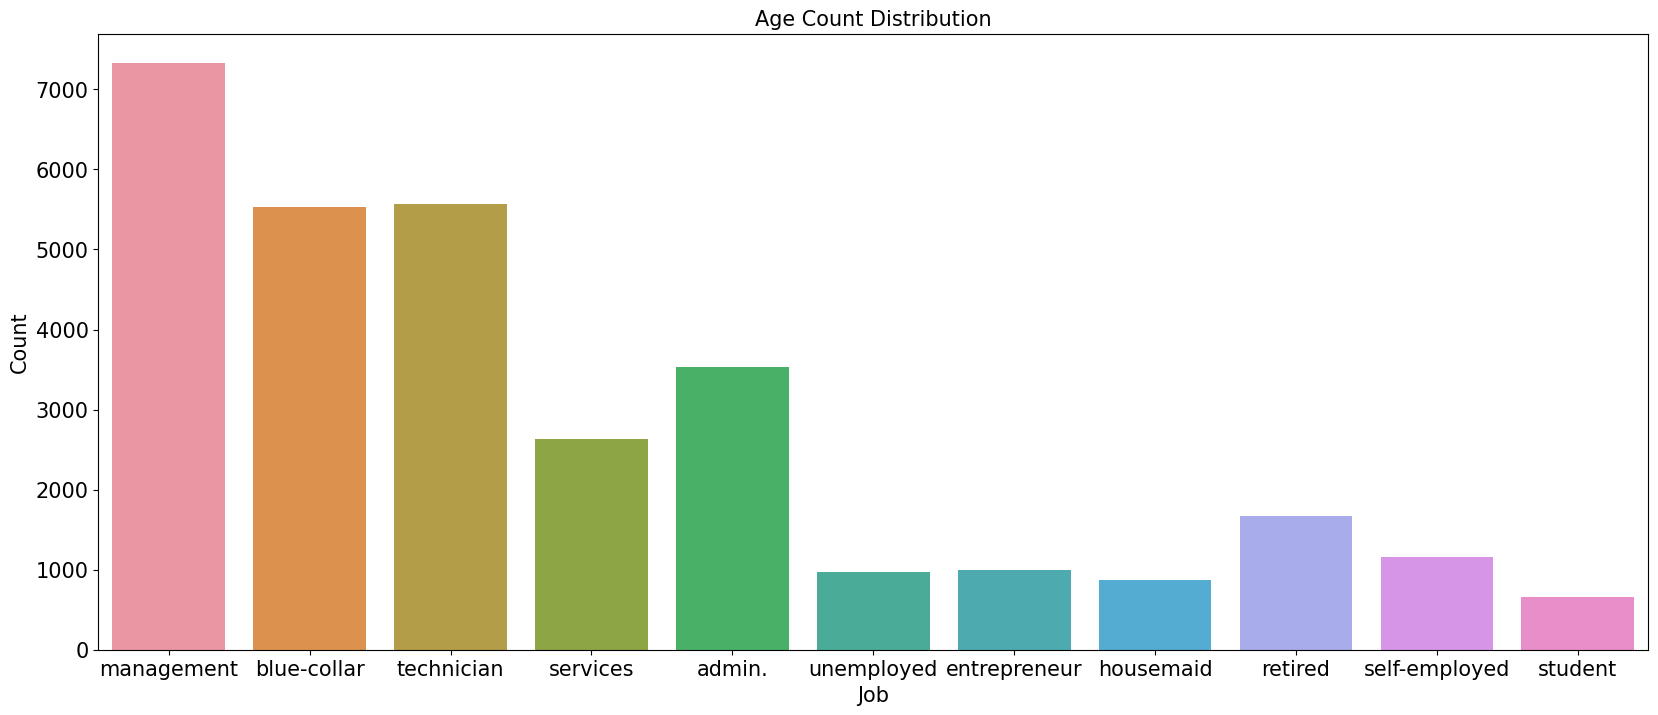

In [28]:
#Jobs
# What kind of jobs clients this bank have
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job', data = bank_client)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)


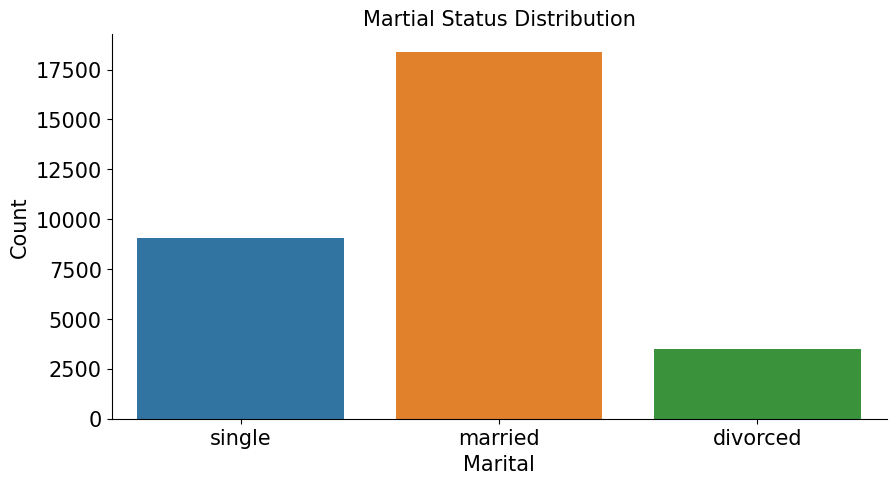

In [29]:
# Martial Status
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'marital', data = bank_client)
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Martial Status Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

Most of the people are married and single

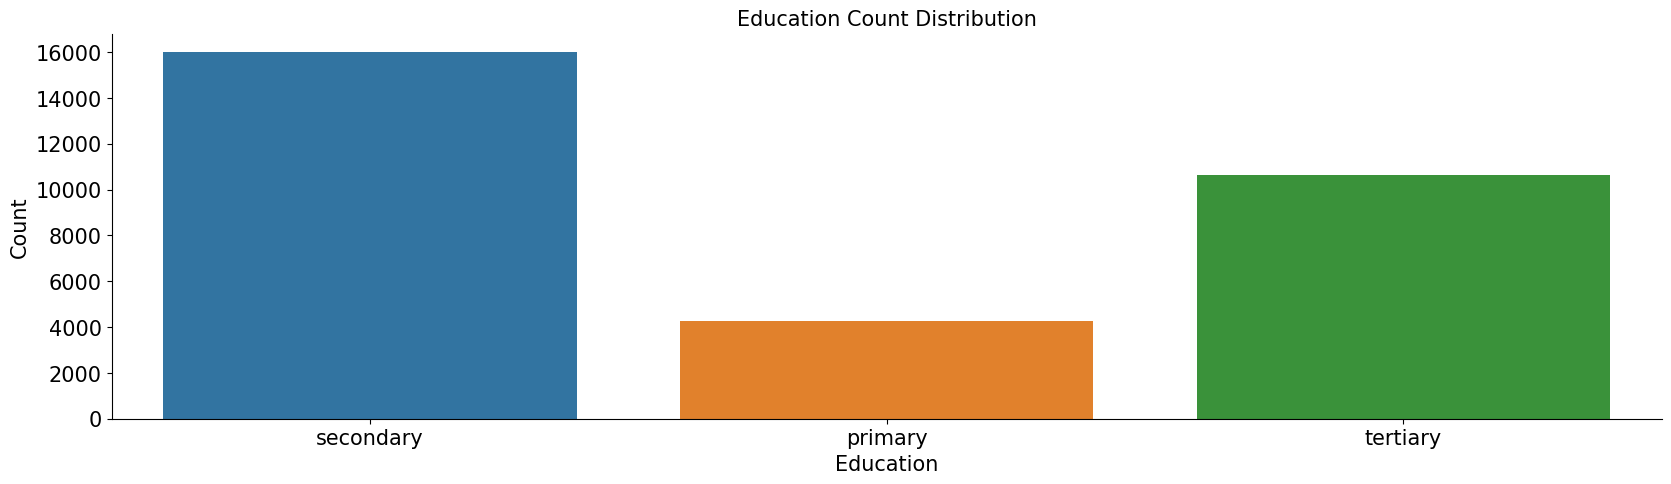

In [30]:
# Education
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'education', data = bank_client)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

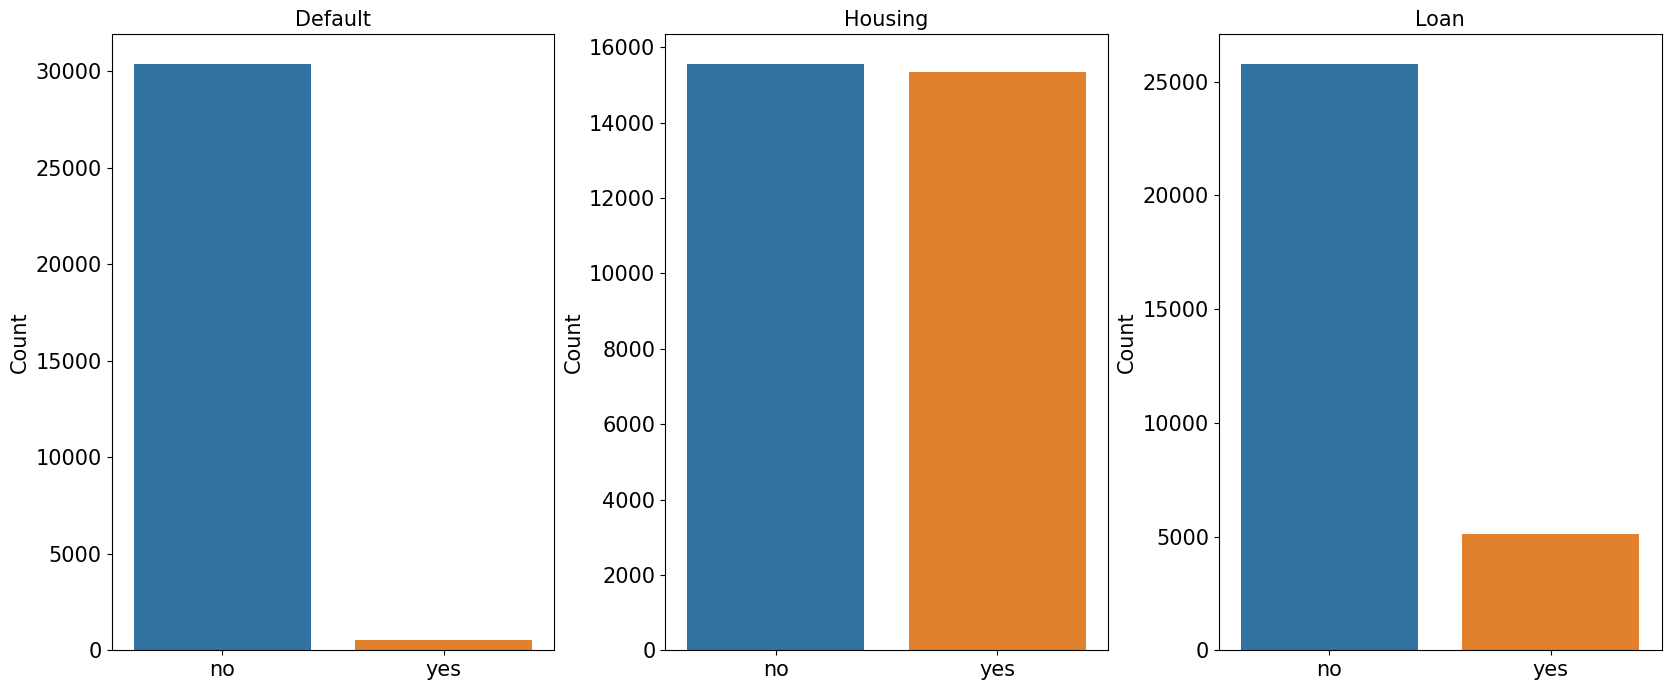

In [31]:
# Default, has credit in default ?
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.countplot(x = 'default', data = bank_client, ax = ax1, order = ['no', 'yes'])
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

# Housing, has housing loan ?
sns.countplot(x = 'housing', data = bank_client, ax = ax2, order = ['no', 'yes'])
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

# Loan, has personal loan ?
sns.countplot(x = 'loan', data = bank_client, ax = ax3, order = ['no', 'yes'])
ax3.set_title('Loan', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)

###### Converting categorical features to numerical

In [32]:
class CategoricalToNumerical():
    def __init__(self):
        self.columns = None
        self.mapping = {}
        
    def fit(self, X, y=None):
        self.columns = X.columns
        for col in X.columns:
            if X[col].dtype == 'object':
                values = list(set(X[col]))
                self.mapping[col] = {val:i for i, val in enumerate(values)}
        return self
    
    def transform(self, X):
        X = X.copy()
        for col in X.columns:
            if col in self.mapping:
                X[col] = X[col].apply(lambda x: self.mapping[col].get(x, -1))
        return X


In [33]:
# define categorical columns
categorical_cols = ['job', 'marital','education','default','housing','loan']

# create an instance of CategoricalToNumerical transformer
cat_to_num_transformer = CategoricalToNumerical()

# fit the transformer to the training data
cat_to_num_transformer.fit(bank_client[categorical_cols])

# transform the categorical columns in the training and test data
bank_client[categorical_cols] = cat_to_num_transformer.transform(bank_client[categorical_cols])

In [34]:
bank_client.head()

,age,job,marital,education,default,housing,loan
0,1,5,0,2,0,0,0
1,4,3,1,1,0,0,0
2,3,3,1,2,0,0,1
3,1,8,0,2,0,0,0
4,1,8,0,2,0,1,1


### Attributes related with the last contact of the current campaign:

In [35]:
# Slicing DataFrame to treat separately, make things more easy
bank_related = bank_data.iloc[: , 8:12]
bank_related.head()

,contact,day,month,duration
0,cellular,4,jul,255
1,cellular,4,jul,297
2,cellular,4,jul,668
3,telephone,4,jul,65
4,cellular,4,jul,436


In [36]:
print('\n contact:', bank_related['contact'].unique())
print('\n Day of week:', bank_related['day'].unique())
print('\n month:', bank_related['month'].unique())


 contact: ['cellular' 'telephone']

 Day of week: [ 4  7  8  9 10 11 14 15 16 17 18 21 22 23 24 25 28 29 30 31  5  6 12 13
 19 20 26 27  2  3  1]

 month: ['jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'may' 'jun' 'sep']


Day of week should be last contact day of the week (categorical: 'mon','tue','wed','thu','fri') but here data might be wrong better to drop the feature and see the model performance

In [37]:
#droping day of week column
bank_related=bank_related.drop(labels='day',axis=1)

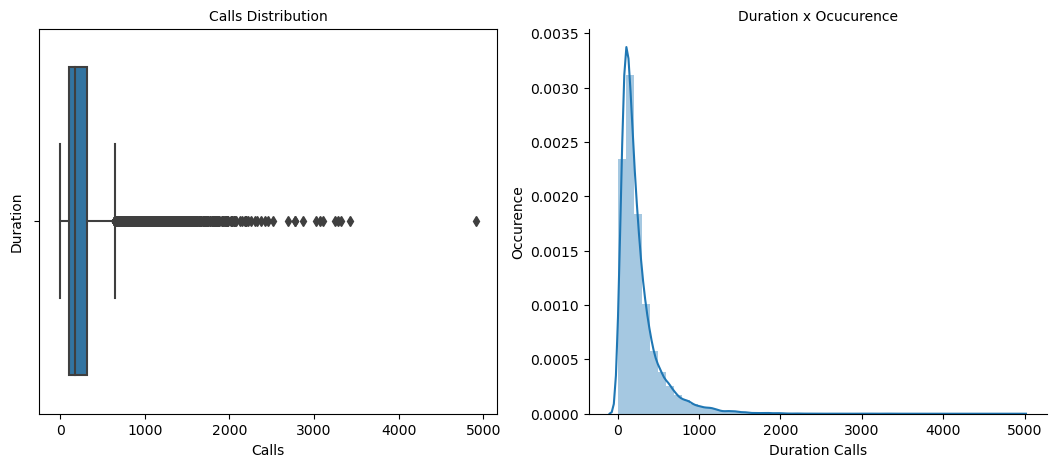

In [38]:
#boxplot of duration feature
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'duration', data = bank_related, orient = 'v', ax = ax1)
ax1.set_xlabel('Calls', fontsize=10)
ax1.set_ylabel('Duration', fontsize=10)
ax1.set_title('Calls Distribution', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(bank_related['duration'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Duration Calls', fontsize=10)
ax2.set_ylabel('Occurence', fontsize=10)
ax2.set_title('Duration x Ocucurence', fontsize=10)
ax2.tick_params(labelsize=10)


In [39]:
# Quartiles
print('1º Quartile: ', bank_related['duration'].quantile(q = 0.25))
print('2º Quartile: ', bank_related['duration'].quantile(q = 0.50))
print('3º Quartile: ', bank_related['duration'].quantile(q = 0.75))
print('4º Quartile: ', bank_related['duration'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower_limit = q1 - (IQR * 1.5)
  # upper_limit = q3 + (IQR * 1.5)
    
print('Duration calls above: ', bank_related['duration'].quantile(q = 0.75) + 
                      1.5*(bank_related['duration'].quantile(q = 0.75) - bank_related['duration'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  104.0
2º Quartile:  181.0
3º Quartile:  322.0
4º Quartile:  4918.0
Duration calls above:  649.0 are outliers


In [40]:
print('Numerber of outliers: ', bank_related[bank_related['duration'] > 643]['duration'].count())
print('Number of clients: ', len(bank_related))

Numerber of outliers:  2252
Number of clients:  30907


In [41]:
# if the call duration is equal to 0, then is obviously that this person didn't subscribed, 
bank_data[(bank_data['duration'] == 0)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
9886,35,technician,married,secondary,no,5535,no,no,cellular,26,aug,0,15,-1,0,no
22823,31,entrepreneur,married,secondary,no,162,yes,yes,cellular,11,may,0,2,-1,0,no


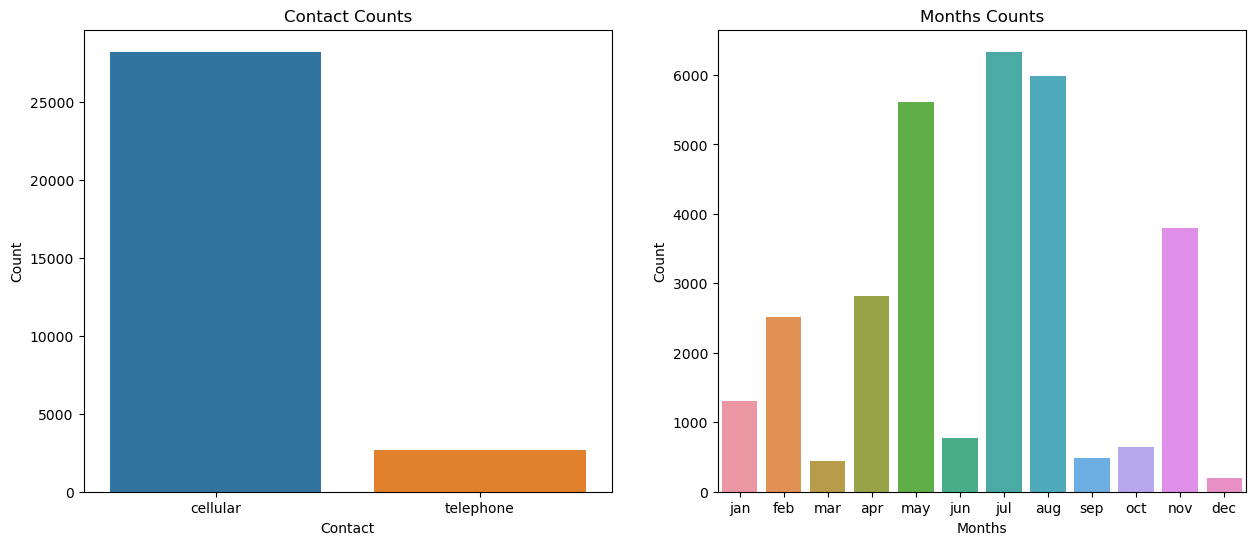

In [42]:
#Contacts made by which means
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,6))
sns.countplot(bank_related['contact'], ax = ax1)
ax1.set_xlabel('Contact', fontsize = 10)
ax1.set_ylabel('Count', fontsize = 10)
ax1.set_title('Contact Counts')
ax1.tick_params(labelsize=10)

#Contacts month of the year
sns.countplot(bank_related['month'], ax = ax2, order = ['jan','feb','mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax2.set_xlabel('Months', fontsize = 10)
ax2.set_ylabel('Count')
ax2.set_title('Months Counts')
ax2.tick_params(labelsize=10)

In [43]:
#Converting categorical attributes to numerical
# define categorical columns
categorical_cols = ['contact', 'month']

# create an instance of CategoricalToNumerical transformer
cat_to_num_transformer = CategoricalToNumerical()

# fit the transformer to the training data
cat_to_num_transformer.fit(bank_related[categorical_cols])

# transform the categorical columns in the training and test data
bank_related[categorical_cols] = cat_to_num_transformer.transform(bank_related[categorical_cols])

In [44]:
bank_related.head()

,contact,month,duration
0,1,5,255
1,1,5,297
2,1,5,668
3,0,5,65
4,1,5,436


In [45]:
#dividing duration to 5 classes
def duration(data):

    data.loc[data['duration'] <= 103, 'duration'] = 1
    data.loc[(data['duration'] > 103) & (data['duration'] <= 180)  , 'duration']    = 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319)  , 'duration']   = 3
    data.loc[(data['duration'] > 319) & (data['duration'] <= 643), 'duration'] = 4
    data.loc[data['duration']  > 643, 'duration'] = 5

    return data
duration(bank_related);

In [46]:
bank_related.head()

,contact,month,duration
0,1,5,3
1,1,5,3
2,1,5,5
3,0,5,1
4,1,5,4


#### Other attributes

In [47]:
bank_other = bank_data.loc[: , ['campaign', 'pdays','previous']]
bank_other.head()

,campaign,pdays,previous
0,1,-1,0
1,1,-1,0
2,2,-1,0
3,2,-1,0
4,4,-1,0


In [48]:
print('\n campaign:', bank_other['campaign'].unique())
print('\n pdays:', bank_other['pdays'].unique())
print('\n previous:', bank_other['previous'].unique())


 campaign: [   1    2    4    3    6    5   19    9    8    7   14   15   11   12
   30   33   13   20   10   24   26   35   17   27   16   31   28   21
   18   23   22   29   25   34   36   39   43   32   38   50   44 5451
 4551 4674  771 1563  891  546 5553 4552]

 pdays: [ -1 151 166  91  86 143  89 140 176 174 167 195 165 129 188 196 172 118
 119 104 171 117 164 132 131 123 159 186 111 115 116 173 178 110 152 103
 175 193 181 185 154 145 138 126 150  96 180 109 158 168  97 182 127 130
 194 125 105 102  26 179  28 183 155 112 120 137 124 187 190 113 162 134
 169 189   8 144 191 184 170 177   5  99 133  93  92  10 100 156 198 106
 153 146 128   7 121 160 107  90  27 147 197 136 101 139 122 157 149 135
  30 114  98 192 163  34  95 141  31 199  94 108  29 268 247 253 244 239
 245 204 231 238 258 230 265  71 223 246 250 266 205 240 261 259 241 260
 234 226 251 225 161 237 262 248 254 255 220 227 224 206 249 235 228 263
   2 270 232 252 207 200 269 233 256 273 272 242 264 208 214 222 27

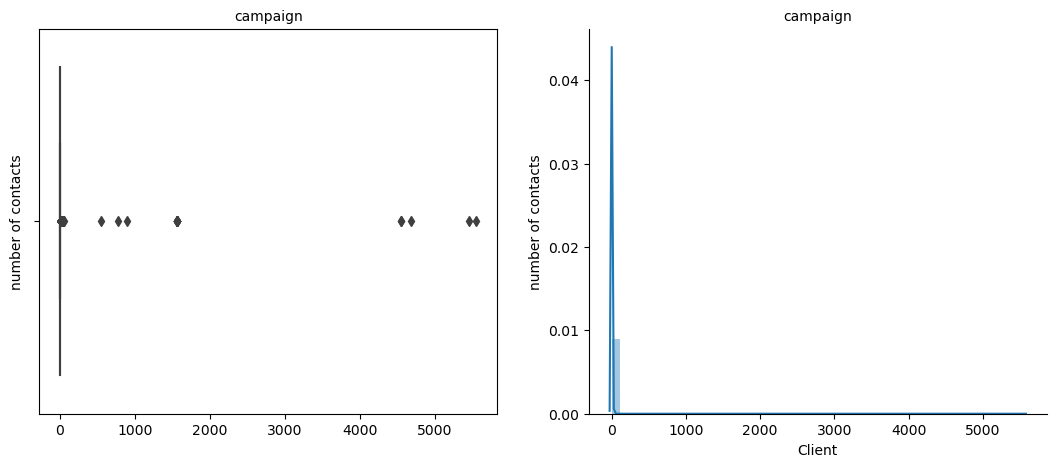

In [49]:
#plot of campaign feature
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'campaign', data = bank_other, orient = 'v', ax = ax1)
ax1.set_xlabel('', fontsize=10)
ax1.set_ylabel('number of contacts', fontsize=10)
ax1.set_title('campaign', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(bank_other['campaign'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Client', fontsize=10)
ax2.set_ylabel('number of contacts', fontsize=10)
ax2.set_title('campaign', fontsize=10)
ax2.tick_params(labelsize=10)


In [50]:
print('1º Quartile: ', bank_other['campaign'].quantile(q = 0.25))
print('2º Quartile: ', bank_other['campaign'].quantile(q = 0.50))
print('3º Quartile: ', bank_other['campaign'].quantile(q = 0.75))
print('4º Quartile: ', bank_other['campaign'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower_limit = q1 - (IQR * 1.5)
  # upper_limit = q3 + (IQR * 1.5)
    
print('Campaign above: ', bank_other['campaign'].quantile(q = 0.75) + 
                      1.5*(bank_other['campaign'].quantile(q = 0.75) - bank_other['campaign'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  1.0
2º Quartile:  2.0
3º Quartile:  3.0
4º Quartile:  5553.0
Campaign above:  6.0 are outliers


In [51]:
#Campaign column outlier treatment
q3 = bank_other['campaign'].quantile(0.75)  
q1 = bank_other['campaign'].quantile(0.25)
#print(q3)
#print(q1)
IQR = q3 - q1
#print(IQR)
lower_limit = q1 - (IQR * 1.5)
upper_limit = q3 + (IQR * 1.5)
bank_other['campaign']=np.where(bank_other['campaign']>upper_limit,upper_limit,
    np.where(bank_other['campaign']<lower_limit,lower_limit,bank_other['campaign']))

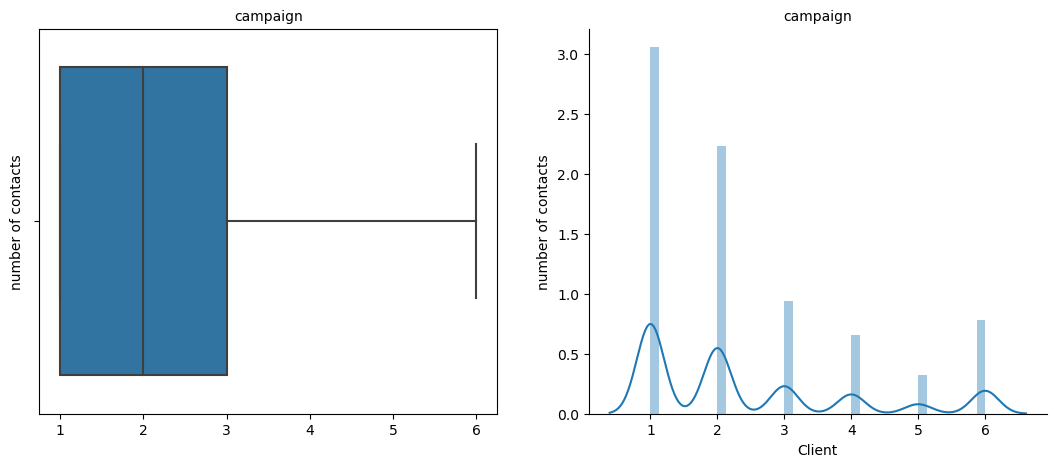

In [52]:
#plot of campaign feature after outlier treatment
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'campaign', data = bank_other, orient = 'v', ax = ax1)
ax1.set_xlabel('', fontsize=10)
ax1.set_ylabel('number of contacts', fontsize=10)
ax1.set_title('campaign', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(bank_other['campaign'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Client', fontsize=10)
ax2.set_ylabel('number of contacts', fontsize=10)
ax2.set_title('campaign', fontsize=10)
ax2.tick_params(labelsize=10)


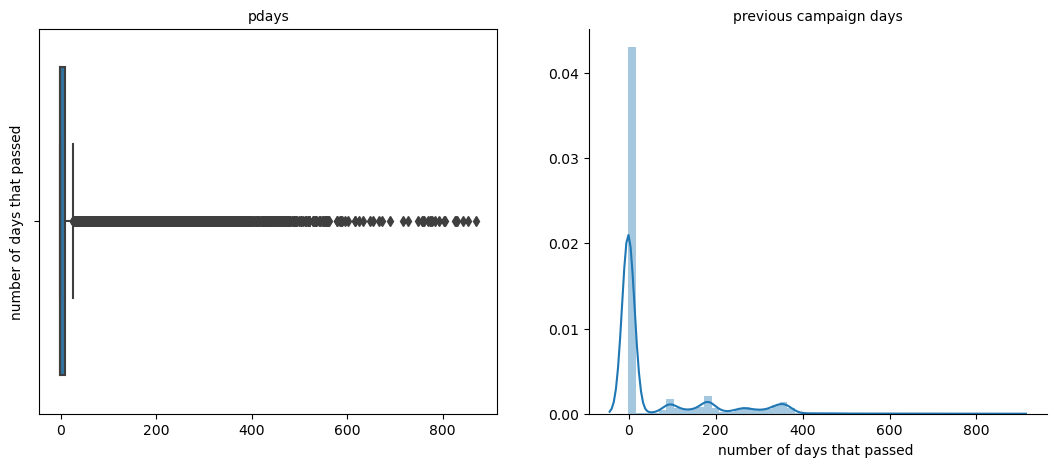

In [53]:
#plot of pdays feature
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'pdays', data = bank_other, orient = 'v', ax = ax1)
ax1.set_xlabel('', fontsize=10)
ax1.set_ylabel('number of days that passed', fontsize=10)
ax1.set_title('pdays', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(bank_other['pdays'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('number of days that passed ', fontsize=10)
ax2.set_ylabel('', fontsize=10)
ax2.set_title('previous campaign days', fontsize=10)
ax2.tick_params(labelsize=10)


In [54]:
bank_other[bank_other['pdays']==999]

,campaign,pdays,previous


In [55]:
bank_other[bank_other['pdays']==-1]

,campaign,pdays,previous
0,1.0,-1,0
1,1.0,-1,0
2,2.0,-1,0
3,2.0,-1,0
4,4.0,-1,0
...,...,...,...
30899,1.0,-1,0
30901,2.0,-1,0
30902,3.0,-1,0
30903,2.0,-1,0


pdays value cannot be -1

In [56]:
#droping pdays of week column
bank_other=bank_other.drop(labels='pdays',axis=1)

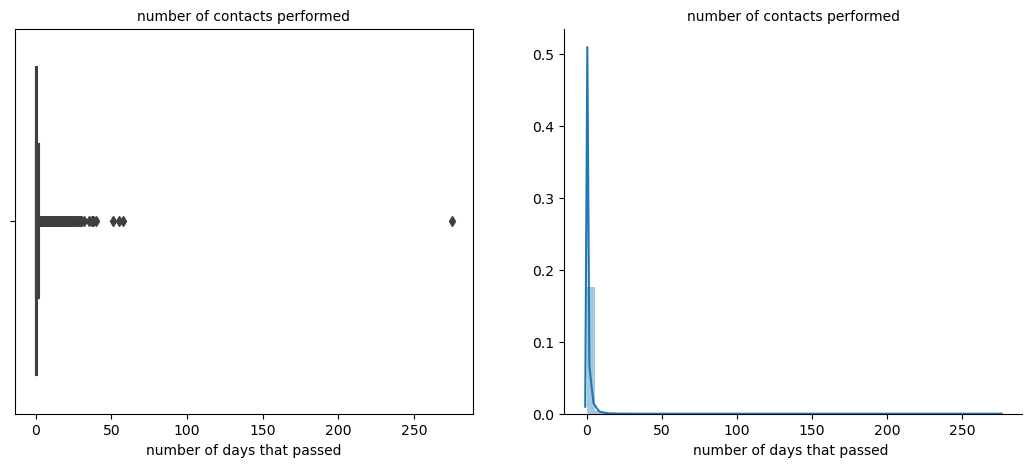

In [57]:
#plot of previous feature
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'previous', data = bank_other, orient = 'v', ax = ax1)
ax1.set_xlabel('number of days that passed', fontsize=10)
ax1.set_ylabel('', fontsize=10)
ax1.set_title('number of contacts performed', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(bank_other['previous'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('number of days that passed ', fontsize=10)
ax2.set_ylabel('', fontsize=10)
ax2.set_title('number of contacts performed', fontsize=10)
ax2.tick_params(labelsize=10)


In [58]:
print('1º Quartile: ', bank_other['previous'].quantile(q = 0.25))
print('2º Quartile: ', bank_other['previous'].quantile(q = 0.50))
print('3º Quartile: ', bank_other['previous'].quantile(q = 0.75))
print('4º Quartile: ', bank_other['previous'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower_limit = q1 - (IQR * 1.5)
  # upper_limit = q3 + (IQR * 1.5)
    
print('Campaign above: ', bank_other['previous'].quantile(q = 0.75) + 
                      1.5*(bank_other['previous'].quantile(q = 0.75) - bank_other['previous'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  0.0
2º Quartile:  0.0
3º Quartile:  1.0
4º Quartile:  275.0
Campaign above:  2.5 are outliers


In [59]:
#Campaign column outlier treatment
q3 = bank_other['previous'].quantile(0.75)  
q1 = bank_other['previous'].quantile(0.25)
#print(q3)
#print(q1)
IQR = q3 - q1
#print(IQR)
lower_limit = q1 - (IQR * 1.5)
upper_limit = q3 + (IQR * 1.5)
bank_other['previous']=np.where(bank_other['previous']>upper_limit,upper_limit,
    np.where(bank_other['previous']<lower_limit,lower_limit,bank_other['previous']))

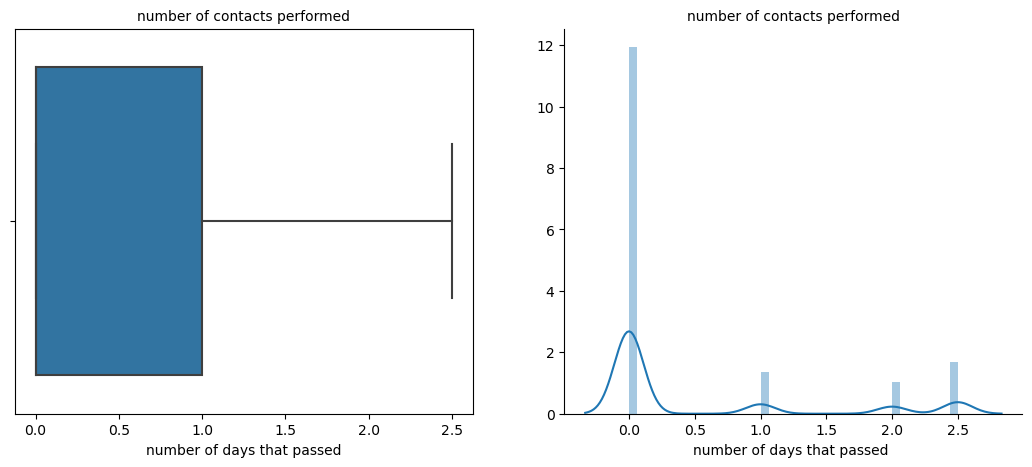

In [60]:
#plot of previous feature after outlier treatment
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'previous', data = bank_other, orient = 'v', ax = ax1)
ax1.set_xlabel('number of days that passed', fontsize=10)
ax1.set_ylabel('', fontsize=10)
ax1.set_title('number of contacts performed', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(bank_other['previous'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('number of days that passed ', fontsize=10)
ax2.set_ylabel('', fontsize=10)
ax2.set_title('number of contacts performed', fontsize=10)
ax2.tick_params(labelsize=10)


In [61]:
#droping previous column
#bank_other=bank_other.drop(labels='previous',axis=1)

In [62]:
bank_other.head()

,campaign,previous
0,1.0,0.0
1,1.0,0.0
2,2.0,0.0
3,2.0,0.0
4,4.0,0.0


#### Y attribute

In [63]:
bank_data[['y']]

,y
0,no
1,no
2,no
3,no
4,no
...,...
30902,yes
30903,yes
30904,yes
30905,no


In [64]:
#Converting target variable to numerical
bank_data['y']=bank_data['y'].map({'no':0,'yes':1})

Text(0.5, 1.0, 'Target variable')

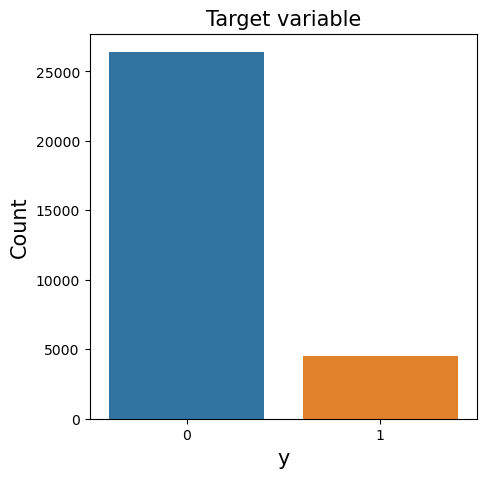

In [65]:
# Target variable
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
sns.countplot(x = 'y', data = bank_data)
ax.set_xlabel('y', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Target variable', fontsize=15)

What is Unbalanced data?
Imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations, i.e one class label has a very high number of observations and the other has a very low number of observations.

Inference: 
Countplot shows the Target variable is highly imbalanced

### Model

In [66]:
X= pd.concat([bank_client, bank_related,bank_other], axis = 1)
y=bank_data[['y']]

In [67]:
X.head()

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,previous
0,1,5,0,2,0,0,0,1,5,3,1.0,0.0
1,4,3,1,1,0,0,0,1,5,3,1.0,0.0
2,3,3,1,2,0,0,1,1,5,5,2.0,0.0
3,1,8,0,2,0,0,0,0,5,1,2.0,0.0
4,1,8,0,2,0,1,1,1,5,4,4.0,0.0


In [68]:
y.head()

,y
0,0
1,0
2,0
3,0
4,0


In [69]:
def train_test_split(X, y, test_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
    indices = np.random.permutation(len(X))
    split_idx = int(len(X) * (1 - test_size))
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]
    return X_train, X_test, y_train, y_test


In [70]:
# Train and evaluate the model using the pipeline
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):
        ''' constructor ''' 
        
        # for decision node
        self.feature_index = feature_index #the index of the feature that this node splits on
        self.threshold = threshold #the threshold value used to split the data at this node
        self.left = left #the left child of this node
        self.right = right #the right child of this node
        self.info_gain = info_gain #the information gain obtained by splitting the data at this node
        
        # for leaf node
        self.value = value #the predicted value of the target variable at this node

In [72]:
class DecisionTreeClassifier():
    def __init__(self, min_samples_split=2, max_depth=2):
        ''' The __init__() function is the constructor of the DecisionTreeClassifier class. It takes two parameters:

            min_samples_split: the minimum number of samples required to split a node
            max_depth: the maximum depth of the tree '''
        
        # initialize the root of the tree 
        self.root = None
        
        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        
    def build_tree(self, dataset, curr_depth=0):
        ''' recursive function to build the tree ''' 
        
        X, Y = dataset[:,:-1], dataset[:,-1]#The X and Y variables represent the features and the target variable of the dataset
        num_samples, num_features = np.shape(X)#number of samples and features in the dataset
        
        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive
            if best_split["info_gain"]>0:
                # recur left
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                # return decision node
                return Node(best_split["feature_index"], best_split["threshold"], 
                            left_subtree, right_subtree, best_split["info_gain"])
        
        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        return Node(value=leaf_value)
    
    def get_best_split(self, dataset, num_samples, num_features):
        ''' function to find the best split '''
        
        # dictionary to store the best split
        best_split = {}
        max_info_gain = -float("inf")
        
        # loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_info_gain = self.information_gain(y, left_y, right_y)
                    # update the best split if needed
                    if curr_info_gain>max_info_gain:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain
                        
        # return best split
        return best_split
    
    def split(self, dataset, feature_index, threshold):
        ''' the split method is used to split the dataset into two subsets based on a given threshold value and a feature index. It takes the following parameters:

            dataset: The dataset to split.
            feature_index: The index of the feature to split on.
            threshold: The threshold value to split on.'''
        
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])#contains all the rows where the feature value is less than or equal to the threshold
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right
    
    def information_gain(self, parent, l_child, r_child):
        ''' function to compute information gain '''
        # calculate entropy of parent node
        parent_entropy = self.entropy(parent)
    
        # calculate entropy of left child node
        left_entropy = self.entropy(l_child)
        
        # calculate entropy of right child node
        right_entropy = self.entropy(r_child)
    
        # calculate weighted average entropy of child nodes
        child_entropy = (len(l_child)/len(parent))*left_entropy + (len(r_child)/len(parent))*right_entropy
    
        # calculate information gain
        gain = parent_entropy - child_entropy
    
        return gain

    
    def entropy(self, y):
        ''' function to compute entropy '''
        
        class_labels = np.unique(y)#gets an array of unique class labels in the set of samples.
        entropy = 0 #This initializes the entropy variable to zero.
        for cls in class_labels: #loops over each class label in the array of unique class labels.
            p_cls = len(y[y == cls]) / len(y) #calculates the probability of a sample 
            entropy += -p_cls * np.log2(p_cls) 
        return entropy
    
        
    def calculate_leaf_value(self, Y):
        ''' function to compute leaf node '''
        
        Y = list(Y)
        return max(Y, key=Y.count)#calculates the majority class label for a leaf node
    
    def print_tree(self, tree=None, indent=" "):
        ''' function to print the tree '''
    
        if not tree:
            tree = self.root
    
        if tree.value is not None:
            print(tree.value)
    
        else:
            print("X"+str(tree.feature_index), "<=", tree.threshold, "?", tree.info_gain)
        
            print(indent + "left: ", end="")
            self.print_tree(tree.left, indent + " ")
        
            print(indent + "right: ", end="")
            self.print_tree(tree.right, indent + " ")

    
    def fit(self, X, Y):
        ''' function to train the tree '''
        
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)
    
    def predict(self, X):
        ''' function to predict the class labels '''
        # convert X to numpy array
        if isinstance(X, pd.DataFrame):
            X = X.values
        
        predictions = [self.make_prediction(x, self.root) for x in X]
        return predictions
    
    def make_prediction(self, x, tree):
        ''' function to traverse the tree and make predictions '''
        
        # leaf node
        if tree.value != None:
            return tree.value
        
        feature_val = x[tree.feature_index]
        if feature_val <= tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)
        
    

In [73]:
model=DecisionTreeClassifier()
# Fit the decision tree on the entire training dataset
model.fit(X_train,y_train)

In [74]:
from sklearn.metrics import accuracy_score
y_train_pred = model.predict(X_train)
# Calculate the training accuracy of the model
acc = accuracy_score(y_train, y_train_pred)
print("Accuracy:", acc)

Accuracy: 0.9223862487360971


In [75]:
y_test_pred = model.predict(X_test) 

In [76]:
accuracy_score(y_test,y_test_pred)

0.6143642834034293

In [77]:
# define a class named CategoricalToNumerical that will be used for encoding categorical features to numerical values
class CategoricalToNumerical():
    # define an initialization method that initializes columns and mapping attributes
    def __init__(self):
        self.columns = None  # a list that will store the names of the columns to be transformed
        self.mapping = {}  # a dictionary that will store the mappings from categorical values to numerical values
        
    # define a fit method that will learn the mapping of categorical values to numerical values
    def fit(self, X, y=None):
        self.columns = X.columns  # store the names of the columns in the columns attribute
        for col in X.columns:  # iterate over the columns of the input dataframe
            if X[col].dtype == 'object':  # check if the column is of object type, i.e. categorical
                values = list(set(X[col]))  # get a list of the unique categorical values in the column
                self.mapping[col] = {val:i for i, val in enumerate(values)}  # create a mapping from each categorical value to a unique integer value
        return self  # return the object itself
        
    # define a transform method that will transform the input dataframe by replacing categorical values with numerical values
    def transform(self, X):
        X = X.copy()  # make a copy of the input dataframe
        for col in X.columns:  # iterate over the columns of the input dataframe
            if col in self.mapping:  # check if the column has a mapping from categorical to numerical values
                X[col] = X[col].apply(lambda x: self.mapping[col].get(x, -1))  # replace each categorical value with its corresponding numerical value using the mapping
        return X  # return the transformed dataframe


In [78]:
#Outlier treatment 
class OutlierTreatment():
    
    # Constructor to initialize method and multiplier values
    def __init__(self, method='iqr', multiplier=1.5):
        self.method = method
        self.multiplier = multiplier
        
    # Fit function that returns self object
    def fit(self, X, y=None):
        return self
        
    # Transform function that applies outlier treatment based on the chosen method
    def transform(self, X):
        # Outlier treatment based on IQR
        if self.method == 'iqr':
            Q1 = np.percentile(X, 25, axis=0) # Calculate the 25th percentile
            Q3 = np.percentile(X, 75, axis=0) # Calculate the 75th percentile
            IQR = Q3 - Q1 # Calculate the Interquartile Range
            lower = Q1 - self.multiplier * IQR # Calculate lower bound
            upper = Q3 + self.multiplier * IQR # Calculate upper bound
            return np.clip(X, lower, upper) # Apply clip function to limit the values between lower and upper bounds
            
        # Outlier treatment based on Z-score
        elif self.method == 'zscore':
            Z = np.abs(stats.zscore(X)) # Calculate Z-scores for each feature
            return X[(Z < self.multiplier).all(axis=1)] # Return the rows where Z-score for all features are less than the multiplier value


In [79]:
class HyperparameterFinder():
    def __init__(self, max_depth_values, min_samples_split_values):
        self.max_depth_values = max_depth_values
        self.min_samples_split_values = min_samples_split_values
        self.best_hyperparameters = None

    def fit(self, X, y=None):        
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        

        # Find the best hyperparameters using the find_best_hyperparameters function
        best_hyperparameters, best_accuracy = self.find_best_hyperparameters(X_train, y_train, X_test, y_test)
        

        # Store the best hyperparameters
        self.best_hyperparameters = best_hyperparameters

        # Create a new decision tree classifier with the best hyperparameters
        self.dt = DecisionTreeClassifier(max_depth=self.best_hyperparameters['max_depth'], min_samples_split=self.best_hyperparameters['min_samples_split'])

        # Fit the decision tree on the entire training dataset
        self.dt.fit(X_train, y_train)

        return self

    def transform(self, X, y=None):
        # Create a new decision tree classifier with the best hyperparameters
        dt = DecisionTreeClassifier(max_depth=self.best_hyperparameters['max_depth'], min_samples_split=self.best_hyperparameters['min_samples_split'])
        
        # Fit the decision tree on the entire training dataset
        dt.fit(X, y)

        # Return the predictions on the entire dataset
        return dt.predict(X), self.best_hyperparameters


    def find_best_hyperparameters(self, X_train, y_train, X_test, y_test):
        hyperparameters = {'max_depth': None, 'min_samples_split': None}
        best_accuracy = 0.0

        for max_depth in self.max_depth_values:
            for min_samples_split in self.min_samples_split_values:
                # Create a new decision tree classifier with the current hyperparameters
                dt = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split)

                # Fit the decision tree on the training dataset
                dt.fit(X_train, y_train)

                # Evaluate the decision tree on the testing dataset
                y_pred = dt.predict(X_test)
                accuracy = accuracy_score(y_test, y_pred)

                # Check if the current hyperparameters are better than the previous best hyperparameters
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    hyperparameters['max_depth'] = max_depth
                    hyperparameters['min_samples_split'] = min_samples_split
                    best_params = {'max_depth': max_depth, 'min_samples_split': min_samples_split}
                # Print the current hyperparameters and accuracy for debugging
                print(f"max_depth={max_depth}, min_samples_split={min_samples_split}, accuracy={accuracy}")
                
        # Print the best hyperparameters and accuracy for debugging
        print(f"best_hyperparameters={hyperparameters}, best_accuracy={best_accuracy}")
        return hyperparameters, accuracy

In [80]:
#Pipeline class
class Pipeline():
    def __init__(self, steps):
        self.steps = steps
        
    # method to fit and transform data using all steps
    def fit_transform(self, X):
        # iterate through all steps and apply fit_transform method to X
        for name, step in self.steps:
            X = step.fit_transform(X)
        # return transformed data
        return X

    # method to transform data using all steps
    def transform(self, X):
        # iterate through all steps and apply transform method to X
        for name, step in self.steps:
            X = step.transform(X)
        # return transformed data
        return X

    # method to fit data using all steps
    def fit(self, X, y=None):
        # iterate through all steps and apply fit_transform method to X
        for name, step in self.steps:
            X = step.fit(X, y).transform(X)
        # return Pipeline object
        return self


In [81]:
#reading the data
bank_data=pd.read_csv('Bank Client Deposit Data set Classification.csv')

In [82]:
preprocessing_pipeline = Pipeline([
     ('encoder', CategoricalToNumerical()),#encode categorical columns to numerical values
    ('outlier_treatment', OutlierTreatment())#apply outlier treatment on the data
])

In [83]:
#fit the pipeline on the bank_data dataset.
preprocessing_pipeline.fit(bank_data)

In [84]:
#dropping all features found irrevalent
bank_data=bank_data.drop(labels=['balance','duration','pdays','day','poutcome'],axis=1)

In [85]:
#Replace all special charaters with nan and dropping all observation containing null values
for column in bank_data.columns:
    bank_data[column].replace(['unknown','?',"","na","NA"], np.nan, inplace=True)
    bank_data.dropna(inplace=True)
bank_data.reset_index(inplace=True,drop=True)#eset the index to be sequential

In [86]:
# Define the column indices or names for numeric and categorical columns
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month']
numeric_cols = ['age', 'duration', 'campaign', 'previous']
# create an instance of CategoricalToNumerical transformer
cat_to_num_transformer = CategoricalToNumerical()

# fit the transformer to the training data
cat_to_num_transformer.fit(bank_data[categorical_cols])

# transform the categorical columns
bank_data[categorical_cols] = cat_to_num_transformer.transform(bank_data[categorical_cols])

In [87]:
X=bank_data.drop(labels='y',axis=1)
y=bank_data[['y']]

In [88]:
ot = OutlierTreatment(method='iqr', multiplier=1.5)
ot.fit(X)
X=ot.transform(X)

In [89]:
# Train and evaluate the model using the pipeline
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
pipeline = Pipeline([   
    ('preprocessing', preprocessing_pipeline),
    ('DecisionTreeClassifier',DecisionTreeClassifier())
])

In [91]:
model=DecisionTreeClassifier()
model.fit(X_train, y_train)

In [92]:
y_train_pred = model.predict(X_train)

In [93]:
# Calculate the training accuracy of the model
acc = accuracy_score(y_train, y_train_pred)
print("Accuracy:", acc)

Accuracy: 0.9177350859453994
